# Softmax回归 pytorch实现
> 本部分代码看起来有些复杂，但只需要掌握最核心的代码即可
>
> 我们借助了动手学习深度学习课程的[d2l库](https://github.com/d2l-ai/d2l-zh)，来导入数据集，对此表示感谢。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from utils import train

In [2]:
# 加入数据集
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

D:\tensorflow1\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Pytorch不会隐式的调整输入的形状

# 我们定义了展平层flatten
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)  # 初始化超参数

loss = nn.CrossEntropyLoss()  # 交叉熵损失

trainer = torch.optim.SGD(net.parameters(), lr=0.1)  # 优化器

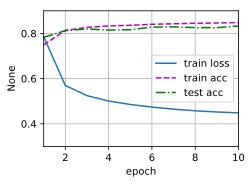

In [4]:
# 训练
if __name__ == '__main__':
    num_epochs = 10
    train(net, train_iter, test_iter, loss, num_epochs, trainer)




